# Filter for Relevant Comments

Dataset contains a lot of unrelated comments to the brand "Sesh." Filter for only related posts & comments before beginning text analysis.

In [535]:
import pandas as pd

comments = pd.read_csv("../data/csv/comments.csv")
comments.head()

,date,text,score,title
0,07/17/2024 14:35,American Zyn nicotine pouches have to have som...,10,American Zyn nicotine pouches have to have som...
1,07/17/2024 14:50,American zyns have been analyzed by MassSpecEv...,68,American Zyn nicotine pouches have to have som...
2,07/17/2024 14:53,I know that's the only thing that makes me act...,4,American Zyn nicotine pouches have to have som...
3,07/17/2024 18:28,All I know is when I use a dif brand the powde...,4,American Zyn nicotine pouches have to have som...
4,07/17/2024 17:50,Just use 3mg and relax. Every other brand I've...,9,American Zyn nicotine pouches have to have som...


In [536]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3388 non-null   object
 1   text    3387 non-null   object
 2   score   3388 non-null   int64 
 3   title   3388 non-null   object
dtypes: int64(1), object(3)
memory usage: 106.0+ KB


In [537]:
# basic data transforms for ease
comments["text"] = comments.text.str.lower()
comments["title"] = comments.title.str.lower()


In [538]:
comments.head()

,date,text,score,title
0,07/17/2024 14:35,american zyn nicotine pouches have to have som...,10,american zyn nicotine pouches have to have som...
1,07/17/2024 14:50,american zyns have been analyzed by massspecev...,68,american zyn nicotine pouches have to have som...
2,07/17/2024 14:53,i know that's the only thing that makes me act...,4,american zyn nicotine pouches have to have som...
3,07/17/2024 18:28,all i know is when i use a dif brand the powde...,4,american zyn nicotine pouches have to have som...
4,07/17/2024 17:50,just use 3mg and relax. every other brand i've...,9,american zyn nicotine pouches have to have som...


In [539]:
# Use regex to find relevant posts

# find comments with "sesh"
# TODO: Coalasce these two regex patterns
sesh_reg = r'sesh'
sesh_comments = comments[(comments.text.str.contains(sesh_reg)) | (comments.title.str.contains(sesh_reg))]

# , but not "smoke sesh" or "study sesh"
non = r"(smoke sesh|study sesh|night sesh|gym sesh|sesh booze|jerk sesh|friday sesh)"
sesh_comments = sesh_comments[(~sesh_comments.text.str.contains(non)) & (~sesh_comments.title.str.contains(non))]
sesh_comments.head()

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\3249221477.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sesh_comments = sesh_comments[(~sesh_comments.text.str.contains(non)) & (~sesh_comments.title.str.contains(non))]


,date,text,score,title
11,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...
48,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?
77,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...
80,04/21/2023 15:27,media,3,anybody have a take or impression on sesh+ or ...
81,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...


In [540]:
len(sesh_comments)

272

# Clean Up Comments

Remove media posts, deleted comments and duplicate comments.

In [541]:
# remove invalid
sesh_comments = sesh_comments[(sesh_comments["text"] != "media") & (sesh_comments["text"] != "[deleted]")]

# remove dupes
sesh_comments.drop_duplicates(subset=["date", "text"], inplace=True)

sesh_comments.head()

,date,text,score,title
11,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...
48,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?
77,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...
81,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...
82,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...


In [542]:
len(sesh_comments)

241

In [543]:
# save for obs
sesh_comments.to_csv("../data/csv/sesh_comments.csv", index=False)

In [544]:
# load back in
import pandas as pd 

sesh_comments = pd.read_csv("../data/csv/sesh_comments.csv")

# Simple Sentiment Column Via Score

Using the score column, can we get some simple sentiment?

<Axes: ylabel='Frequency'>

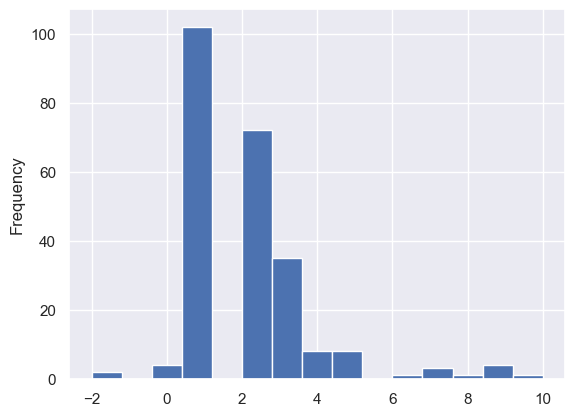

In [545]:
sesh_comments.score.plot.hist(bins=15)

# right-skewed data, might not be useful. Interested to see what the right-most samples are...

In [546]:
sesh_comments[sesh_comments["score"] > 50]

# after filtering for >50 score comments, I've discovered more data to filter

,date,text,score,title


In [547]:
sesh_comments[sesh_comments["score"] > 5]

# interesting sentiment

,date,text,score,title
20,07/14/2024 18:37,sesh mint is my favorite,6,best mint pouch?
33,07/10/2024 15:22,ya zyn can make me nauseous but i also have a ...,9,does zyn make anyone else feel ill?
39,03/27/2024 16:47,a good friend of mine that i've known from the...,9,"first time trying sesh, never even heard of th..."
94,07/16/2024 16:32,"lucy, sesh, zone, zeo for us based ones. when ...",9,phillip morris announces $600 million zyn faci...
109,02/11/2024 14:17,finally a normal product and not some “extreme...,7,sesh doesn’t get much mention around here.
159,03/27/2023 19:04,anyone try sesh nicotine pouches? i just recei...,7,sesh nic pouches? anyone?
160,03/28/2023 06:23,"i haven't tried them, they're made in sweden a...",10,sesh nic pouches? anyone?
188,11/26/2023 13:16,you gonna get to it once you're done with the ...,8,stoked to try this mango sesh
233,06/10/2024 13:00,"fré, zone, sesh, lucy breakers, nic-s are all ...",7,why does the us only get dry portions?
236,03/17/2024 22:53,8mg is just kind of viewed as a higher end of ...,9,why don't we get these strengths in the us?


# Do NLTK

Analyze text and frequency distributions

In [548]:
import nltk
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AZZA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[

True

In [549]:
# analyze frequency distributions 

# remove duplicate comments
list_comments = sesh_comments["text"].tolist()

# turn into words to prep for frequency analysis
words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
words = [w.lower() for w in words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(words)

In [550]:
fd.tabulate(20)

       sesh     pouches    nicotine        like         zyn        good       pouch      flavor          us         get      really         try         one       tried        mint        lucy       mango wintergreen      growth         way 
        119          92          91          86          62          48          48          43          42          40          39          39          37          37          34          33          32          28          28          27 


<Axes: title={'center': 'most frequent word used in comments'}, xlabel='Samples', ylabel='Counts'>

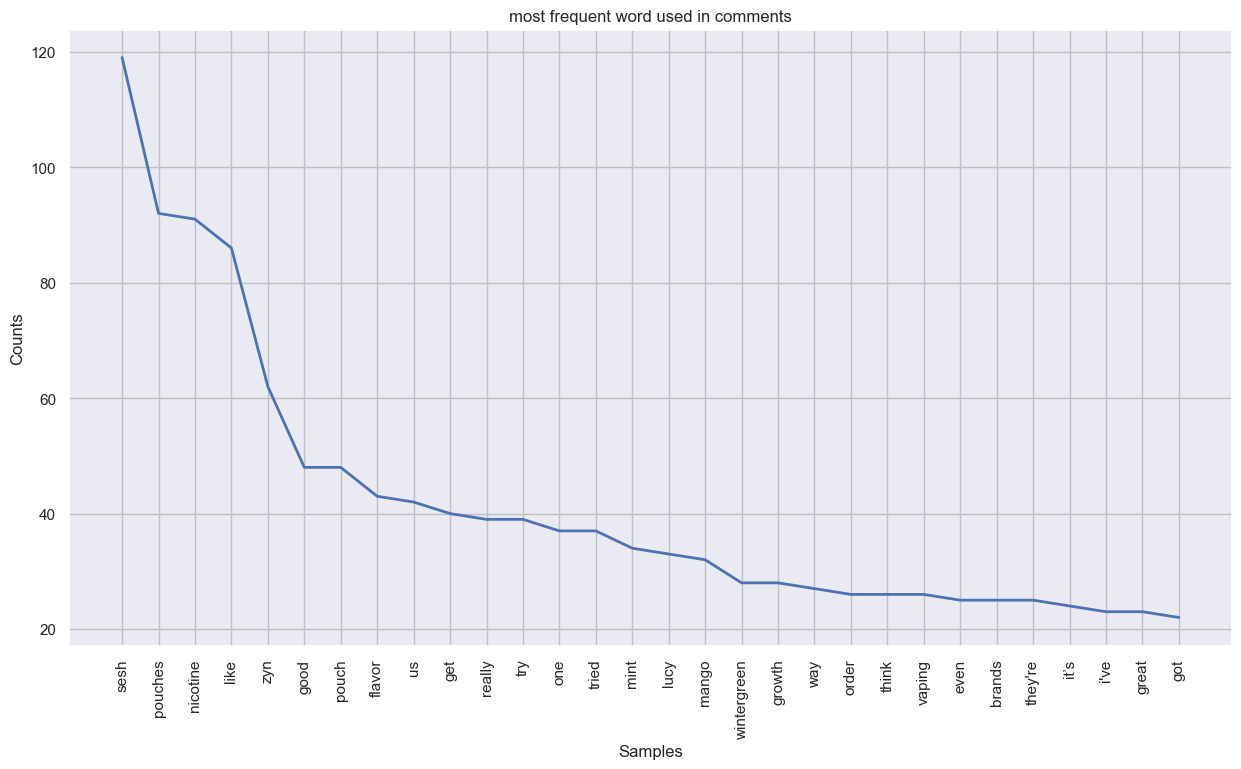

In [551]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in comments")

In [552]:
# get text concordance 
text = nltk.Text(words)

In [553]:
text.concordance("zyn")

Displaying 25 of 62 matches:
5 10 words could hahahajaha upper lip zyn even tell really matter (had talk cs 
 lips really bad currently use rogue, zyn rogue zyn definitely best flavor, cof
ly bad currently use rogue, zyn rogue zyn definitely best flavor, coffee zyn go
ue zyn definitely best flavor, coffee zyn good rogue nailed cinnamon, honey lem
uy nicotine pouches online mostly get zyn (i 1000 points rewards), occasionally
e trying new ones none really compare zyn zyn best even though 15 per container
ying new ones none really compare zyn zyn best even though 15 per container (20
american velo trash honestly american zyn best gas stations whatnot around that
s lucy seems one found really enjoyed zyn on, velo rogue suck! although i've br
gotten yet let know though compare ya zyn ones liked tried lucy unfortunately o
y stock importantly strength line on! zyn (9 mg sesh seems hit 6mg zyn) 6-8 usu
 something thats ass (juicehead) also zyn enjoyer usually look deals keep handf
joyer usual

In [554]:
# find bi-grams
finder = nltk.collocations.BigramCollocationFinder.from_words(words)

finder.ngram_fd.tabulate(25)

 ('nicotine', 'pouches')        ('juice', 'head')        ('sesh', 'mango')    ('growth', 'markets')       ('pretty', 'good')        ("i've", 'tried')      ('nicotine', 'gum')    ('nicotine', 'pouch')          ('try', 'sesh')         ('sesh', 'mint')         ('feel', 'like')  ('sesh', 'wintergreen')         ('lucy', 'sesh')         ('apple', 'ice')     ('moist', 'pouches')          ('want', 'try')      ('sesh', 'pouches') ('nicotine', 'pouches,')      ('market', 'share')        ('tried', 'sesh')          ('i’m', 'sure')   ('swedish', 'pouches')         ('nic', 'pouch')         ('like', 'mint')       ('lucy,', 'sesh,') 
                      20                       11                        8                        8                        7                        7                        7                        7                        6                        6                        6                        6                        5                        5                        5

# ChatGPT Sentiment Analysis

Using the the openai API, analyze the sentimnet of comments. Join into dataset.

In [555]:
ai_rates = pd.read_csv("../data/csv/sentiments.csv")

ai_rates.head()

,sentiment
0,irrelevant
1,irrelevant
2,negative
3,irrelevant
4,positive


In [556]:
ai_rates.value_counts()

sentiment 
irrelevant    104
positive       42
neutral        30
negative       25
Name: count, dtype: int64

In [557]:
ai_rates = ai_rates.apply(lambda x: x.str.rstrip("."))

In [558]:
ai_rates.value_counts()

sentiment 
irrelevant    104
positive       42
neutral        30
negative       25
Name: count, dtype: int64

In [559]:
rate_comments = pd.merge(sesh_comments, ai_rates, left_index=True, right_index=True)

rate_comments.head()

,date,text,score,title,sentiment
0,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,irrelevant
1,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,irrelevant
2,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,negative
3,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,irrelevant
4,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,positive


In [560]:
# save for obs
rate_comments.to_csv("../data/csv/sesh_sentiment.csv", index=False)

<Axes: xlabel='sentiment'>

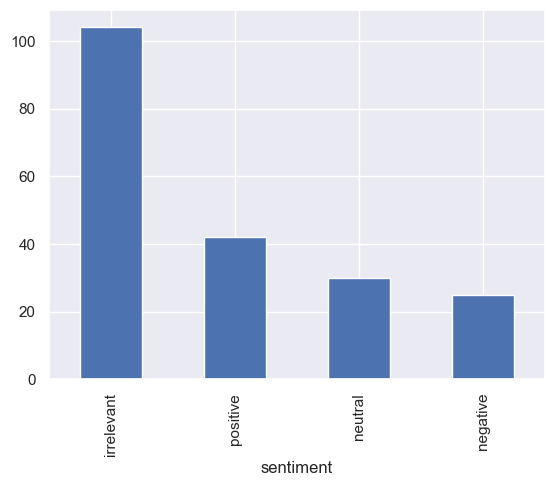

In [561]:
rate_comments.sentiment.value_counts().plot.bar()

<Axes: title={'center': 'most frequent word used in positive comments'}, xlabel='Samples', ylabel='Counts'>

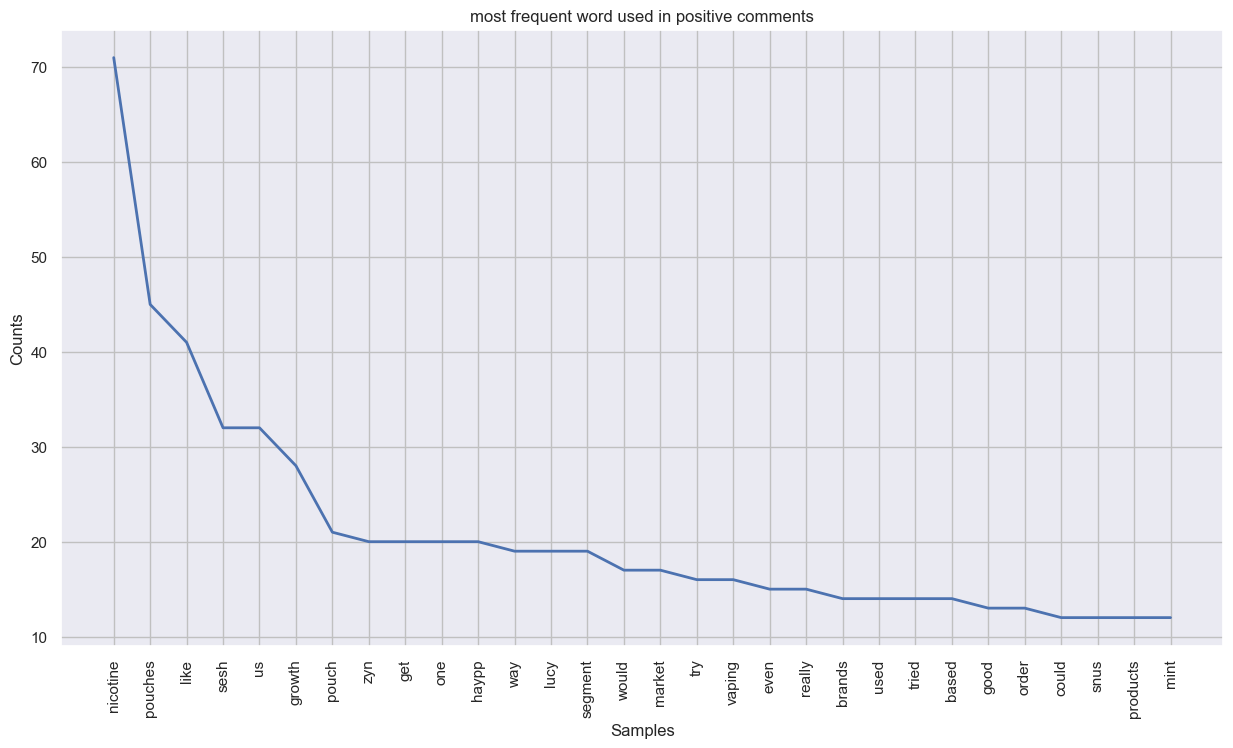

In [562]:
# analyze frequency distributions of irrelevant comments

irr_comments = rate_comments[rate_comments["sentiment"] == "irrelevant"]["text"].tolist()

# turn into words to prep for frequency analysis
irr_words = " ".join(irr_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
irr_words = [w.lower() for w in irr_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(irr_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in positive comments")

In [563]:
# find bi-grams of irrelevant comments
finder = nltk.collocations.BigramCollocationFinder.from_words(irr_words)

finder.ngram_fd.tabulate(25)

           ('nicotine', 'pouches')              ('growth', 'markets')              ('nicotine', 'pouch')                ('nicotine', 'gum')           ('nicotine', 'pouches,')                ('market', 'share')                   ('lucy', 'sesh')                   ('feel', 'like')                    ('want', 'try')            ('nordic', 'countries')              ('growth', 'segment')                  ('excise', 'tax')                  ('juice', 'head')                   ('upper', 'lip')                   ('like', 'lucy')                  ('lucy', 'mango')               ('nicotine', 'used')                    ('like', 'one')                   ('even', 'feel')                     ('go', 'back')                 ('lucy,', 'sesh,')                ('uk,', 'germany,') ('haypp](https://preview', 'redd')                 ('haypp', 'group')                ('core', 'segment') 
                                16                                  8                                  7                    

<Axes: title={'center': 'most frequent word used in comments'}, xlabel='Samples', ylabel='Counts'>

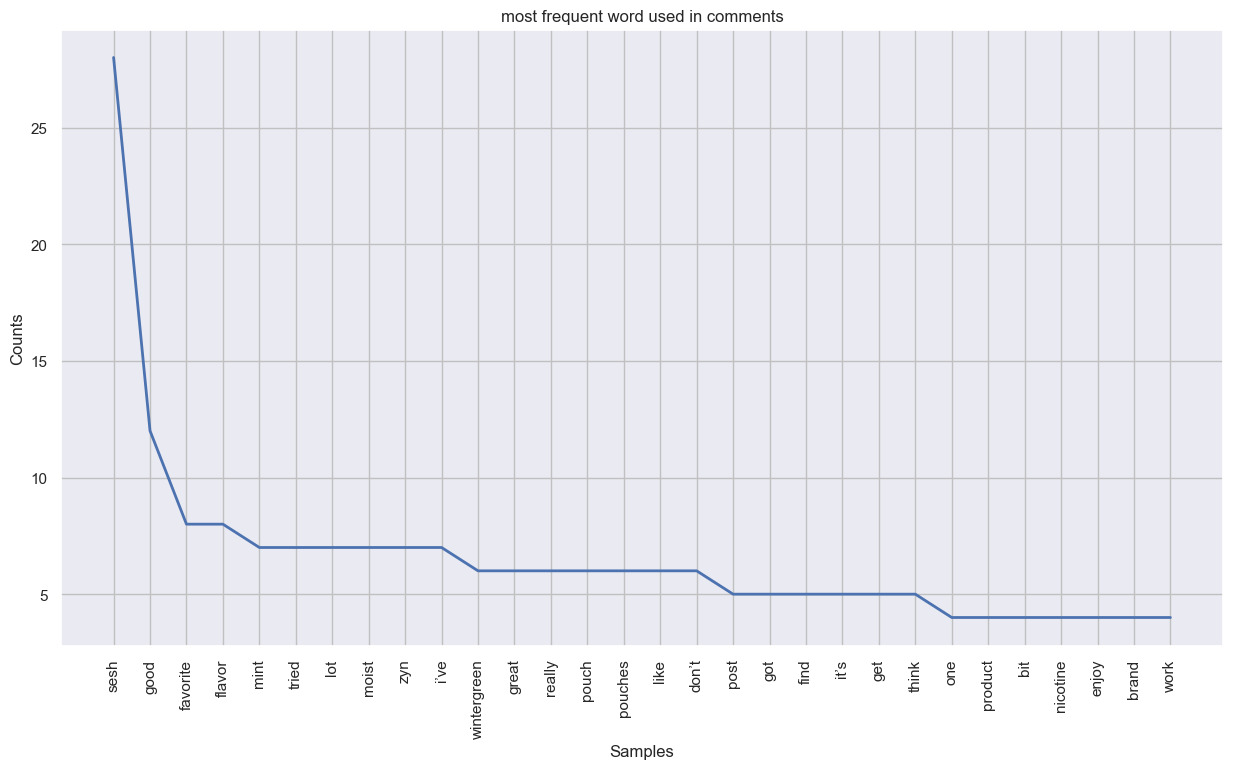

In [564]:
# analyze frequency distributions of positive comments

pos_comments = rate_comments[rate_comments["sentiment"] == "positive"]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(pos_comments).replace(".", " ").split(" ")

# remove stopwords
pos_words = [w.lower() for w in pos_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(pos_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in comments")

In [565]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

       ('sesh', 'mint')    ('mint', 'favorite')        ('sesh', 'good') ('wintergreen', 'sesh')         ('also', 'got')     ('brand', 'really')      ('really', 'good')          ('put', 'lot')         ('lot', 'work')  ('actually', 'pretty')      ('moist', 'pouch')       ('tried', 'sesh')     ('barely', 'moist')       ('sesh', 'clear')   ('favorite', 'pouch')   ('hands', 'favorite')       ('lot', 'people')    ('packed', 'nicely')       ('juice', 'head')  ('thinking', 'making')      ('making', 'post')  ('post', 'hahahahaha') ('hahahahaha', 'order')  ('order', 'nicokick,')  ('nicokick,', 'sesh+') 
                      3                       3                       3                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                

<Axes: title={'center': 'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

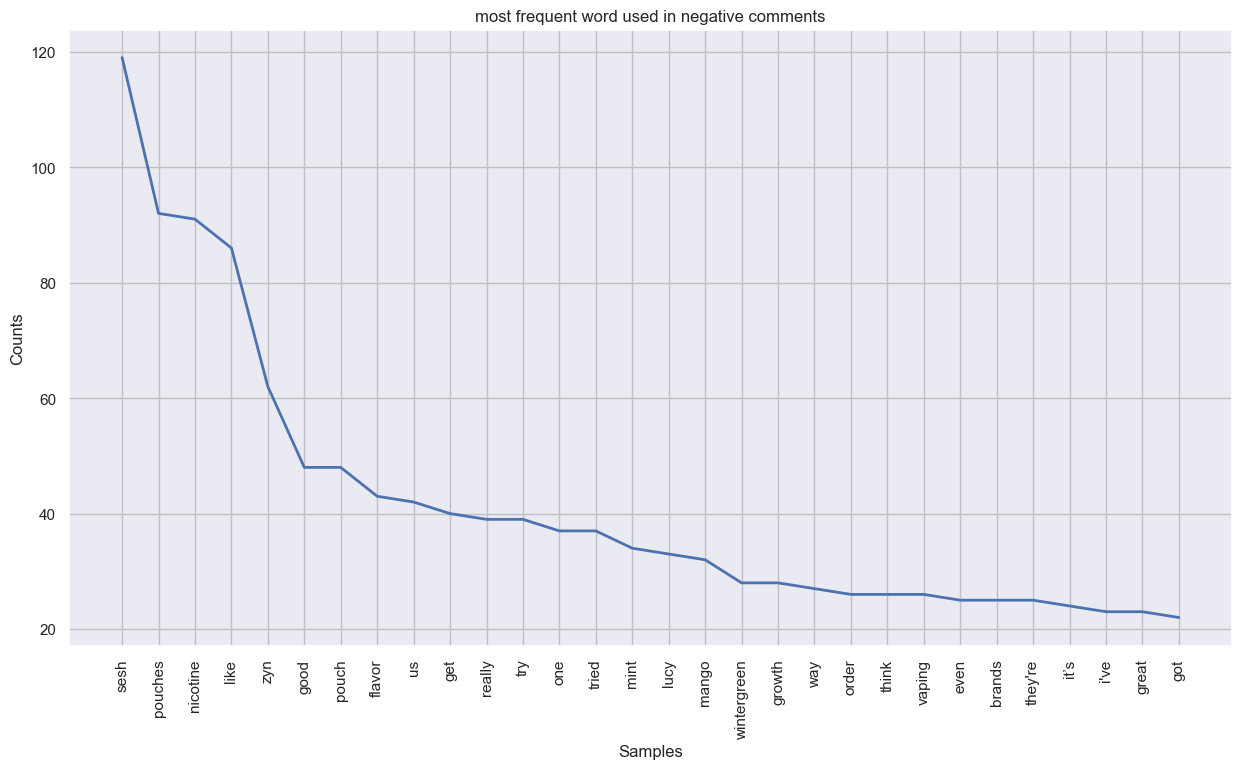

In [566]:
# analyze frequency distributions of negative comments
neg_comments = rate_comments[rate_comments["sentiment"] == "negative"]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [567]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

 ('nicotine', 'pouches')        ('juice', 'head')        ('sesh', 'mango')    ('growth', 'markets')       ('pretty', 'good')        ("i've", 'tried')      ('nicotine', 'gum')    ('nicotine', 'pouch')          ('try', 'sesh')         ('sesh', 'mint')         ('feel', 'like')  ('sesh', 'wintergreen')         ('lucy', 'sesh')         ('apple', 'ice')     ('moist', 'pouches')          ('want', 'try')      ('sesh', 'pouches') ('nicotine', 'pouches,')      ('market', 'share')        ('tried', 'sesh')          ('i’m', 'sure')   ('swedish', 'pouches')         ('nic', 'pouch')         ('like', 'mint')       ('lucy,', 'sesh,') 
                      20                       11                        8                        8                        7                        7                        7                        7                        6                        6                        6                        6                        5                        5                        5

In [568]:
# get text concordance of common terms
text = nltk.Text(neg_words)
text.concordance("mango")

Displaying 25 of 32 matches:
e lol might might like much favorite mango wish sesh mango good lucy haven’t tr
t like much favorite mango wish sesh mango good lucy haven’t tried sesh, nic-s 
hhh nasty taste opinion may like it! mango gawd awful wintergreen pretty good n
 break pretty dang easy helpful info mango cart, think i’ll skip sesh try nic-s
 rogue nailed cinnamon, honey lemon, mango looking higher nic level pouches tho
mint favorite second sesh, also lucy mango brands good well attest! sesh mint f
ike velo recently switched sesh, dig mango flavor it’s definitely easier gums, 
 try sesh easy gums sesh wintergreen mango sesh there? works! usually avoid out
minute pouch sesh wintergreen, mint, mango unflavored pouch think thinking anot
 make sweat sometime… lol tried sesh mango decent may go im exclusive mint pers
icotine gum making feel way stressed mango sesh mango flavor like no, damn prob
 making feel way stressed mango sesh mango flavor like no, damn problem zyn aff
egular buys

# Break Down Flavors In Different Comments

How popular are the terms "mango", "mint" and "wintergreen" across different types of sentiments (positive, negative, neutral)?

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\1005885275.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_rates, y=flavors, palette=colors)


<Axes: >

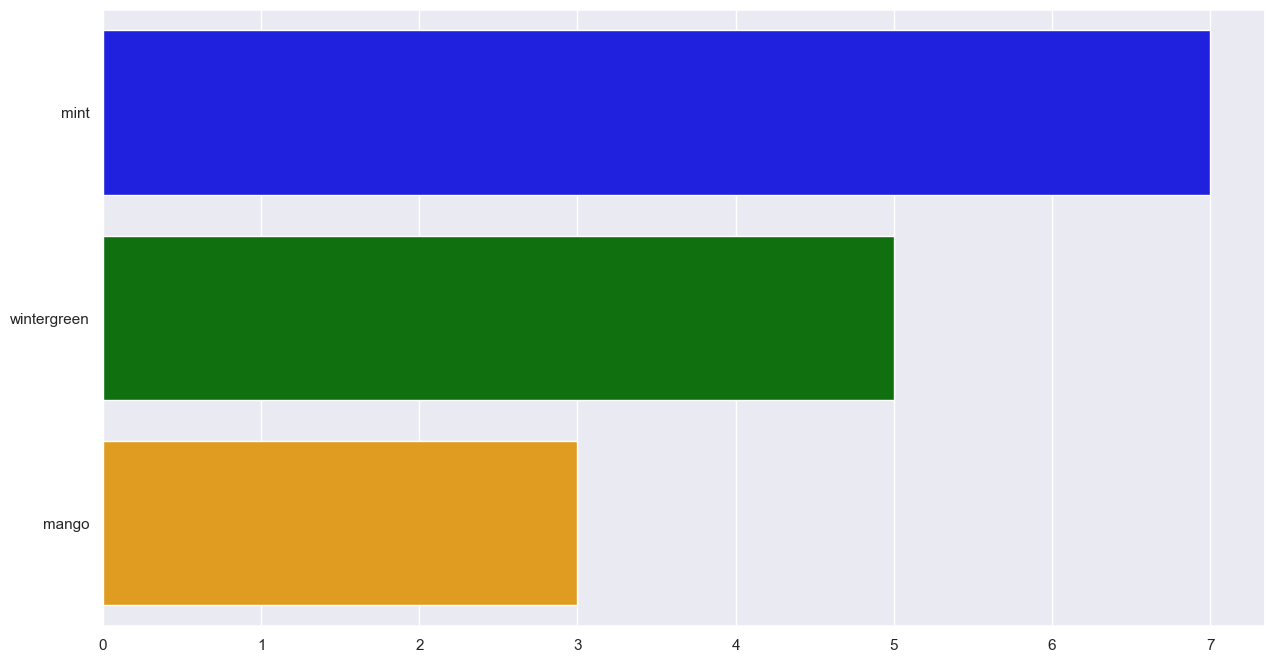

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt

flavors = ["mint", "wintergreen", "mango"]
colors = ["blue", "green", "orange"]

# analyze frequency on flavors in positive comments
pos_comments = rate_comments[rate_comments["sentiment"] == "positive"]["text"].tolist()

pos_rates = []
for flavor in flavors:
    count = len([1 for comment in pos_comments if flavor in comment])
    pos_rates.append(count)

plt.figure(figsize=(15,8))
sns.barplot(x=pos_rates, y=flavors, palette=colors)

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\2862494879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_rates, y=flavors, palette=colors)


<Axes: >

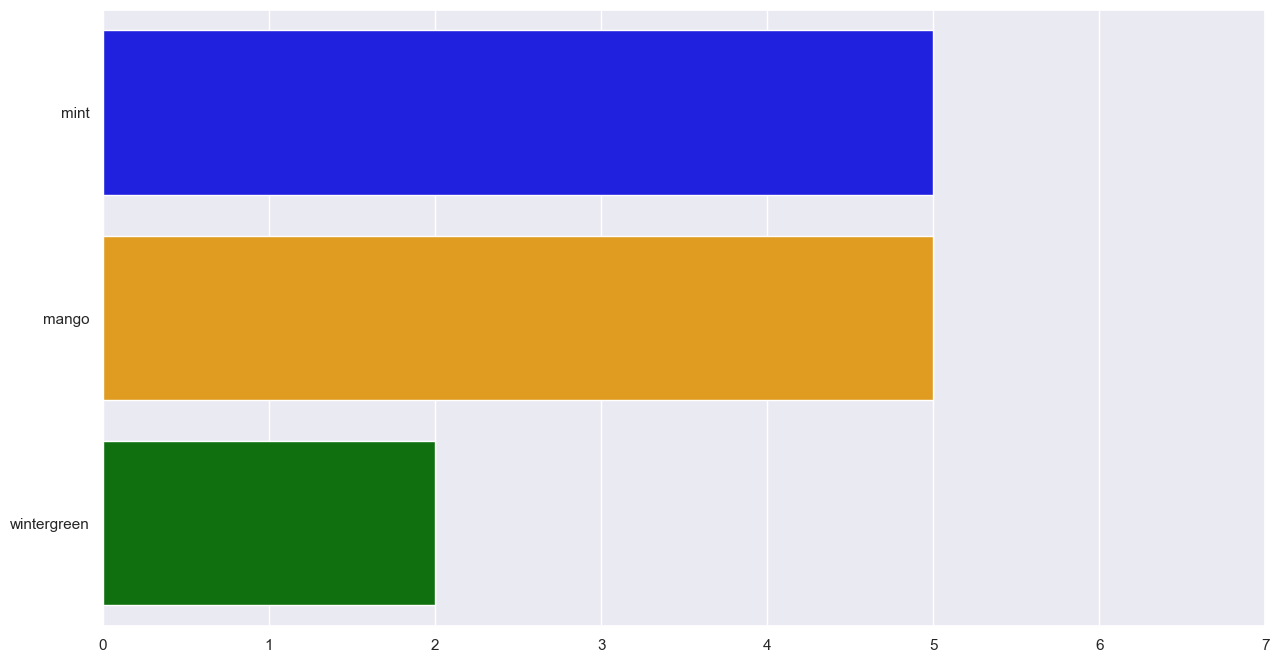

In [570]:
# analyze frequency on flavors in negative comments
neg_comments = rate_comments[rate_comments["sentiment"] == "negative"]["text"].tolist()

flavors = ["mint", "mango", "wintergreen"]
colors = ["blue", "orange", "green"]

neg_rates = []
for flavor in flavors:
    count = sum([1 for comment in neg_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
plt.xlim(right=7)
sns.barplot(x=neg_rates, y=flavors, palette=colors)

In [571]:
# take a look at actual negative flavor comments for mango
[comment for comment in neg_comments if "mango" in comment]

['they are my favorite mango. i wish sesh mango was as good as lucy is',
 'nics is great. sesh is mehhh.. very nasty taste in my opinion but you may like it! the mango was gawd awful. the wintergreen is pretty good. nics are all great but be mindful the pouches break pretty dang easy.',
 'this is helpful info as i had the mango in my cart, i think i’ll skip the sesh and try a few of the nic-s. i’ve heard bad things about the fre like it tearing up lips really bad. i currently use rogue, on and zyn. rogue and zyn definitely have the best flavor, the coffee zyn is too good. and the rogue nailed it with the cinnamon, honey lemon, and mango. looking for higher nic level pouches though, on is ok but the only good flavor on has is the coffee. the other flavors are just so bad',
 'mango sesh is the only mango flavor i did not like',
 "agreed on the juice head. tried one mango strawberry mint, had it in for about three minutes then tossed the rest on the tin in the trash. horrible stuff. my go

In [572]:
# take a look at actual negative flavor comments for mint
[comment for comment in neg_comments if "mint" in comment]

['i am also a zyn enjoyer. i usually look for deals and only keep a handful of zyn cans on hand when they aren’t cheap. the 15 pouch quantity is annoying too aha. zyn are unfortunately the most fully satisfying nic pouch experience that i’ve had thus far. zyn menthol are soo good.i bought a ton of sesh mint and they are alright. 6ish/10 compared to zyn 9/10 imo northerner and prilla run deals sometimes too. i have also noticed that there are only a few domestic nic pouch vendors and very few options compared to what’s available internationally which is odd. anyone know why this is?',
 'fre is in my top 5 for sure, along with zyn and i really do enjoy on! as well. i mainly like mints and menthol. zyn is just so expensive and only 15 pouches. juice head was very mediocre when i tried it plus the pouch texture is not enjoyable imo. i didn’t enjoy sesh very much either.i really only buy zyn these days if it’s on sale or in a pinch locally. i’m hoping we get more options in the next few yea

# Neutrality Analyze

How could we convert neutral experiences into positive?

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\1950474209.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neut_rates, y=flavors, palette=colors)


<Axes: >

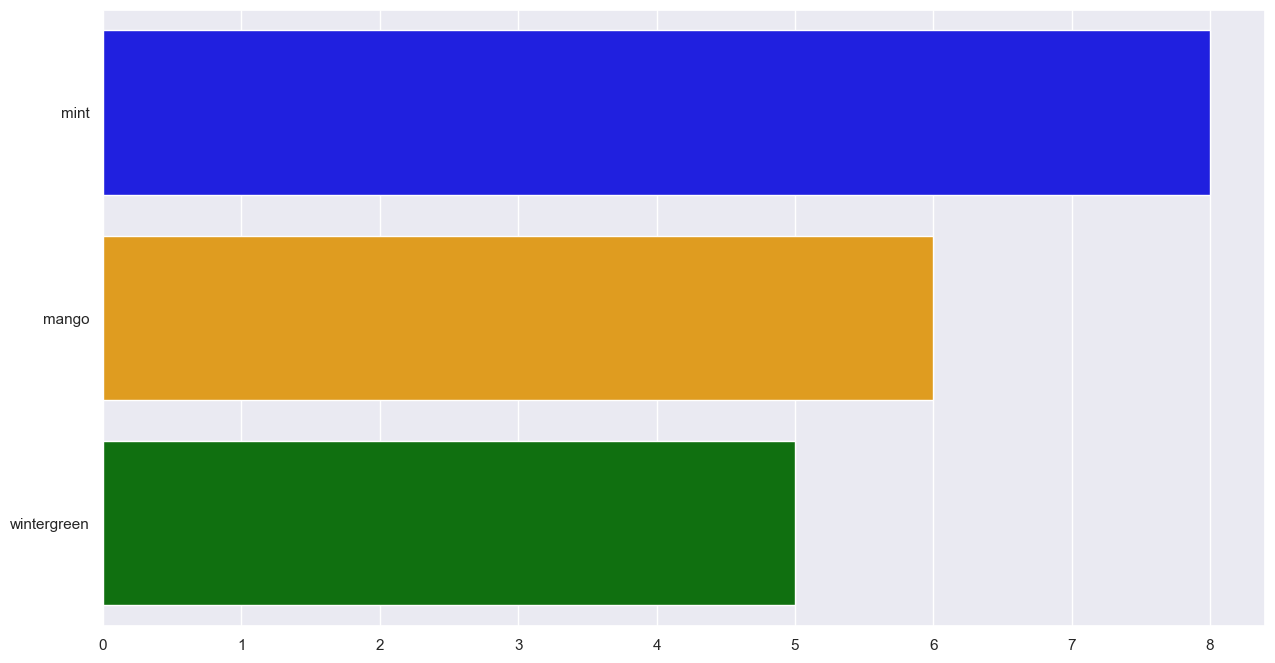

In [573]:
# analyze frequency on flavors in neutral comments
neut_comments = rate_comments[rate_comments["sentiment"] == "neutral"]["text"].tolist()

flavors = ["mint", "mango", "wintergreen"]
colors = ["blue", "orange", "green"]

neut_rates = []
for flavor in flavors:
    count = sum([1 for comment in neut_comments if flavor in comment])
    neut_rates.append(count)

plt.figure(figsize=(15,8))
sns.barplot(x=neut_rates, y=flavors, palette=colors)

In [574]:
# take a look at actual neutral flavor comments
[comment for comment in neut_comments if "mint" in comment]

["my go to website has them for $2 and thats the price point i usually try to stock up at. most importantly how does strength line up with on! and zyn (9 mg sesh seems to hit me the same as 6mg zyn) where 6-8 is usually my preference and i want to make sure their 6 is enough. besides that i'm not picky but i prefer smaller pouches like on/fre and i think lix was good, i only like menthol flavors so i dont really care if their dragon fruit cooked your gums but which of those minty flavors is the best, they have have like 3 different kinds of minty stuff. i saw that they're wet which is my preference anyway. sorry for long post i just wanna make sure i don't stock up on something thats ass (juicehead)",
 'it happens when i do too much in a day. i do 3 6mg peppermint. any more than 3 times a day and my stomach will not be appreciative. sometimes it happens on the 3rd sesh.',
 'these are pretty good but hit and miss. the buc-ee’s stores carry these…i think i read they had some exclusive br

In [575]:
# take a look at actual neutral flavor comments
[comment for comment in neut_comments if "mango" in comment]

['i liked the dragonfruit in 9 but wanted the 6.  any recommendations for fruit flavors that taste great and last that long.  juice head sucks, zyn taste good but don’t last. on are just not good.  do fre taste good?  the strength scares me the 9mg lix make me sweat sometime… lol.  i tried the sesh mango and it was decent.  may go with those.',
 "i'm a user of nicotine gum and pouches, and trying to look for products beyond the samey variety of tastes like what nicorette already offers or that you could find in regular chewing gum already.my regular buys have been on!'s coffee flavor or sesh in mango. it'd be sorta fun to branch out to something that comes in like individual fruits/berries, chocolate, vanilla, etc. or just about anything else that's closer to stuff more foody or tea/coffee &amp; mocktail flavors. i'm not picky.(pouches like i've seen advertised as elderflower, dragonfruit, cactus sour, arctic blue gin, pine, etc. sounded interesting to me but wanted to see what others 

<Axes: title={'center': 'most frequent word used in neutral comments'}, xlabel='Samples', ylabel='Counts'>

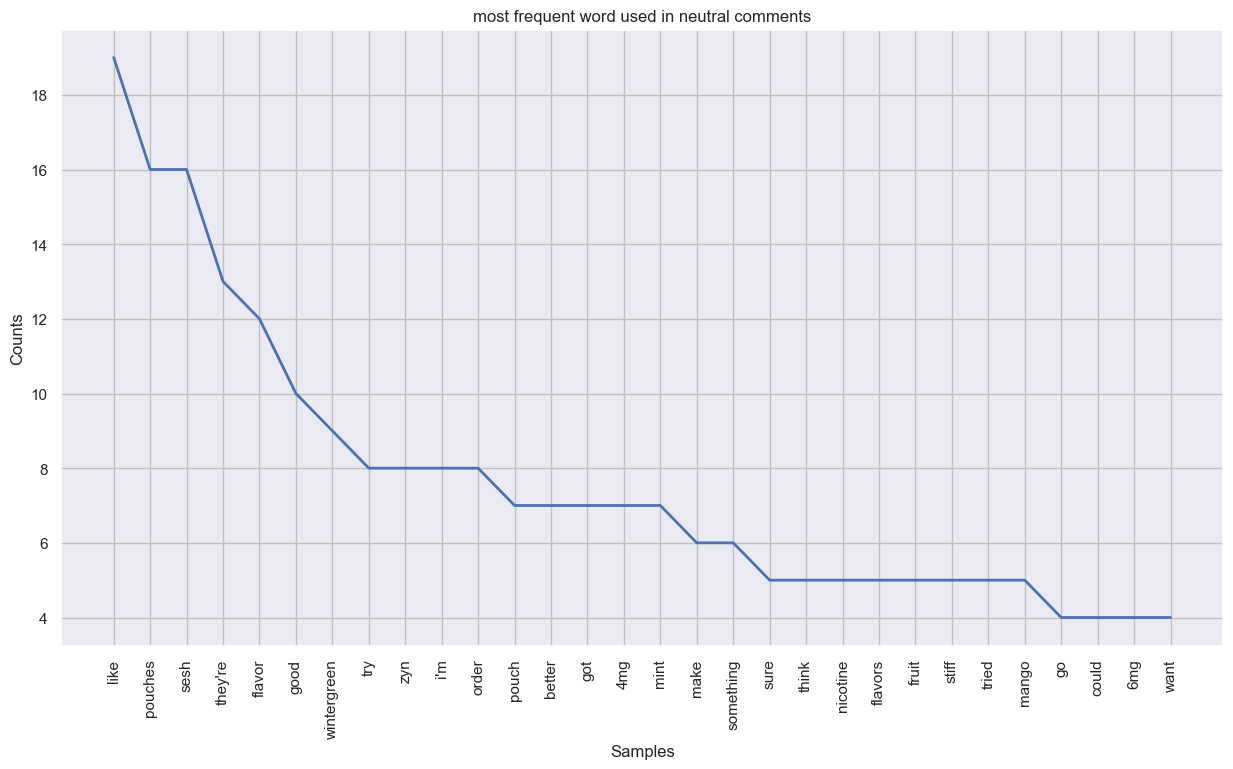

In [576]:
# analyze frequency distributions of neutral comments

neut_comments = rate_comments[rate_comments["sentiment"] == "neutral"]["text"].tolist()

# turn into words to prep for frequency analysis
neut_words = " ".join(neut_comments).replace(".", " ").split(" ")

# remove stopwords
neut_words = [w.lower() for w in neut_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neut_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in neutral comments")

In [577]:
# find bi-grams of neutral comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neut_words)

finder.ngram_fd.tabulate(25)

         ('pretty', 'good')            ('apple', 'ice')             ('i’m', 'sure')            ('make', 'sure')            ("i'm", 'picky')         ('pouches', 'like')            ('feel', 'like')            ('it’s', 'main')           ('good', 'would') ('cinnamon', 'wintergreen')   ('wintergreen', 'flavor')         ('flavor', 'super')       ('better', 'quality')        ('fruit', 'flavors')           ('sesh', 'mango')            ('like', 'mint')          ('flavor', 'sesh')     ('mint', 'wintergreen')         ("they're", 'good')           ('mine', 'today')          ("they're", 'bad')             ('sure', 'i’d')               ('i’d', 'go')               ('go', 'far')           ('far', 'wasn’t') 
                          3                           3                           2                           2                           2                           2                           2                           2                           2                           2                    

# Break Down In-Person or Online Sales 

Across different sentiments, how do individuals buy products?

In [578]:
rate_comments

,date,text,score,title,sentiment
0,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,irrelevant
1,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,irrelevant
2,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,negative
3,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,irrelevant
4,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,positive
...,...,...,...,...,...
196,02/15/2024 01:15,"i’ll have to check that out, i love a good man...",2,stoked to try this mango sesh,irrelevant
197,11/26/2023 16:33,sesh pouches made my teeth feel weird. don’t r...,2,stoked to try this mango sesh,negative
198,11/29/2023 22:17,i become so nasueas at the sight of spearmint ...,2,stoked to try this mango sesh,irrelevant
199,12/02/2023 18:53,damn really lol hopefully that doesn’t happen ...,1,stoked to try this mango sesh,positive


In [579]:
# comments who order online
online_reg = r'((buy|order)[ a-zA-Z]* online|website)'
online_comments = rate_comments[rate_comments.text.str.contains(online_reg)]

# get count of sentiment
online_comments.sentiment.value_counts()

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\2336950000.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  online_comments = rate_comments[rate_comments.text.str.contains(online_reg)]


sentiment
negative      2
irrelevant    2
neutral       1
Name: count, dtype: int64

In [580]:
# view comments themselves
online_comments.text.to_list()

['i buy all my nicotine pouches online and while i mostly get zyn (i have over 1000 points on their rewards), occasionally i will get some other brands they carry because they are cheap and i like trying new ones.none of them really compare to zyn. zyn is the best and even though they have only 15 per container. (20 is standard).my rankings from favorite to least favorite:favoritezynon!veloseshzoneroguejuice headleast favorite',
 "lucy seems to be the only one i found that i really enjoyed other than zyn. on, velo and rogue suck! although i've only had the breakers which may not be for everyone. i liked the quality of them enough that i put in an order online for a bunch of regular lucy cinnamon, apple ice and wintergreen. cause they're impossible to find in the wild.i also got some sesh wintergreen, but i haven't gotten them yet. i can let you know though how they compare.so ya zyn were the only ones i liked until i tried lucy. unfortunately you'll have to order online too.",
 "my go 

In [581]:
# comments who order in stores
store_reg = r'(bucees|store)'
store_comments = rate_comments[rate_comments.text.str.contains(store_reg)]

store_comments.sentiment.value_counts()

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\1718349599.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  store_comments = rate_comments[rate_comments.text.str.contains(store_reg)]


sentiment
positive      4
irrelevant    2
neutral       1
Name: count, dtype: int64

In [582]:
# view comments themselves
store_comments.text.to_list()

['i recently started trying some other brands and ran into sesh at a local store. i tried wintergreen and it was okay, but the mint is great. i’m really surprised i haven’t heard a lot more about sesh on here…just a handful of mixed reviews.',
 'these are pretty good but hit and miss. the buc-ee’s stores carry these…i think i read they had some exclusive brand partnership. i got some wintergreen and it tasted okayish and had pouches that were pretty stiff and stuck together in one clump (they weren’t expired according to the date). gave it another try with the mint, and the pouches were nice and soft and not in a brick. it tasted pretty good too. i would be more apt to go for these as a regular if i could guarantee the pouches were soft and not dried out.',
 "i run a small hedge fund based out of raleigh, nc. myself and my fund are long $haypp. please see the disclaimer at the bottom of the post. for more blog posts like this check out my fund's blog at\xa0[https://www.rogue-funds.com/

# Temporal Trends

In [583]:
# get sentiment across time
dummy_vars = pd.get_dummies(rate_comments.sentiment)

dummy_vars.head()

,irrelevant,negative,neutral,positive
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,True,False,False,False
4,False,False,False,True


In [584]:
encoded = pd.merge(rate_comments.drop(columns=["sentiment"]), dummy_vars, left_index=True, right_index=True)

encoded.head()

,date,text,score,title,irrelevant,negative,neutral,positive
0,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,True,False,False,False
1,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,True,False,False,False
2,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,False,True,False,False
3,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,True,False,False,False
4,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,False,False,False,True


In [585]:
encoded["date"] = pd.to_datetime(encoded["date"])
sent_data = encoded.set_index("date")
sent_data.head()

,text,score,title,irrelevant,negative,neutral,positive
date,,,,,,,
2024-07-18 09:10:00,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,True,False,False,False
2023-08-01 02:15:00,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,True,False,False,False
2024-02-26 20:52:00,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,False,True,False,False
2023-04-22 11:47:00,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,True,False,False,False
2023-04-21 17:47:00,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,False,False,False,True


C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\2599079053.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sent_monthly = sent_data.resample("1M")[["positive", "negative", "neutral", "irrelevant"]].sum()


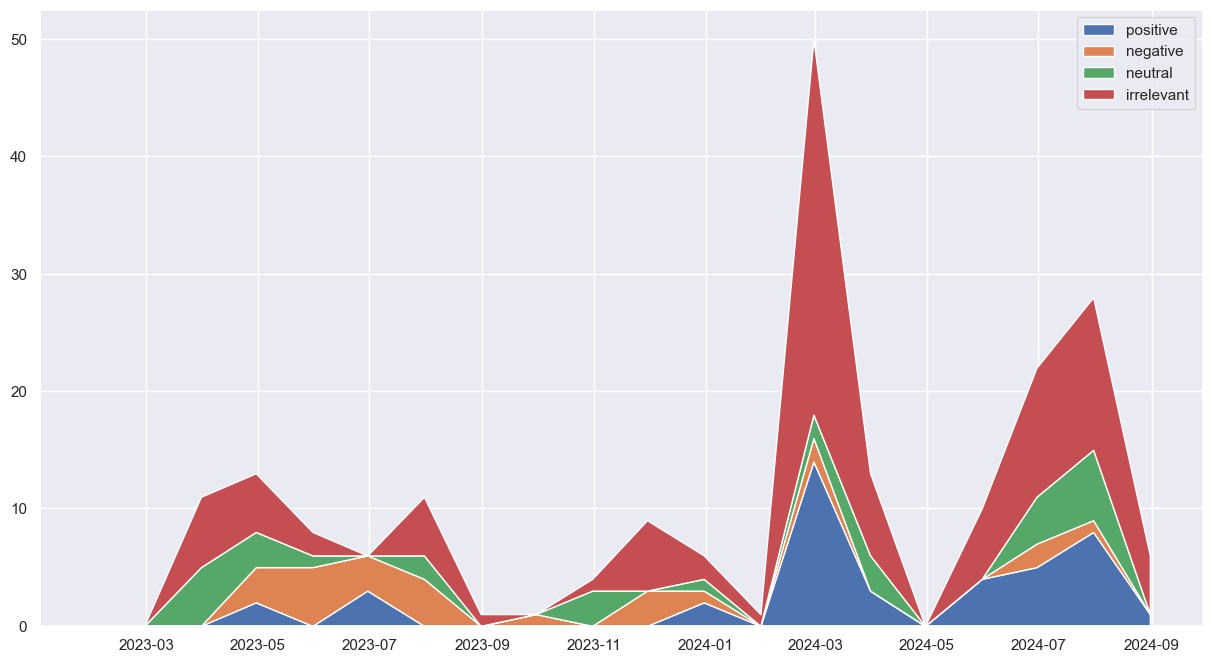

In [586]:
import seaborn as sns
import datetime as dt

sent_monthly = sent_data.resample("1M")[["positive", "negative", "neutral", "irrelevant"]].sum()
# cut off data before 2023 01 due to small sample size
select_date = sent_monthly[sent_monthly.index >= dt.datetime(2023, 1, 1)]

positive = select_date["positive"]
negative = select_date["negative"]
neutral = select_date["neutral"]
irrelevant = select_date["irrelevant"]

plt.figure(figsize=(15,8))
# plt.ylim(0, 10)

sns.set_theme() 

plt.stackplot(positive.index, positive.values, negative.values, neutral.values, irrelevant.values)
plt.legend(labels=['positive', 'negative', "neutral", "irrelevant"])

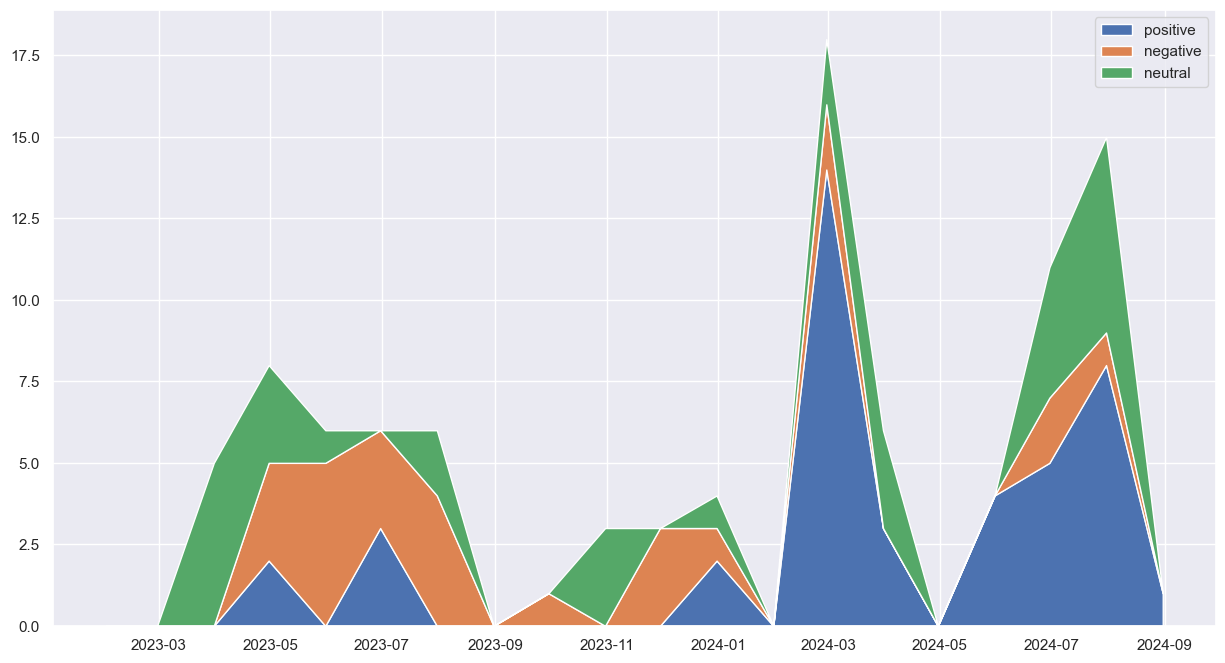

In [587]:
import seaborn as sns
import datetime as dt

positive = select_date["positive"]
negative = select_date["negative"]
neutral = select_date["neutral"]

plt.figure(figsize=(15,8))
# plt.ylim(0, 10)

sns.set_theme() 

plt.stackplot(positive.index, positive.values, negative.values, neutral.values)
plt.legend(labels=['positive', 'negative', "neutral"])

# Temporal Breakdown

It seems like 2023 data entailed a larger share of negative comments, while 2024 saw the opposite. Let's analyze the frequency of words in these 2 years.

## 2023

<Axes: title={'center': 'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

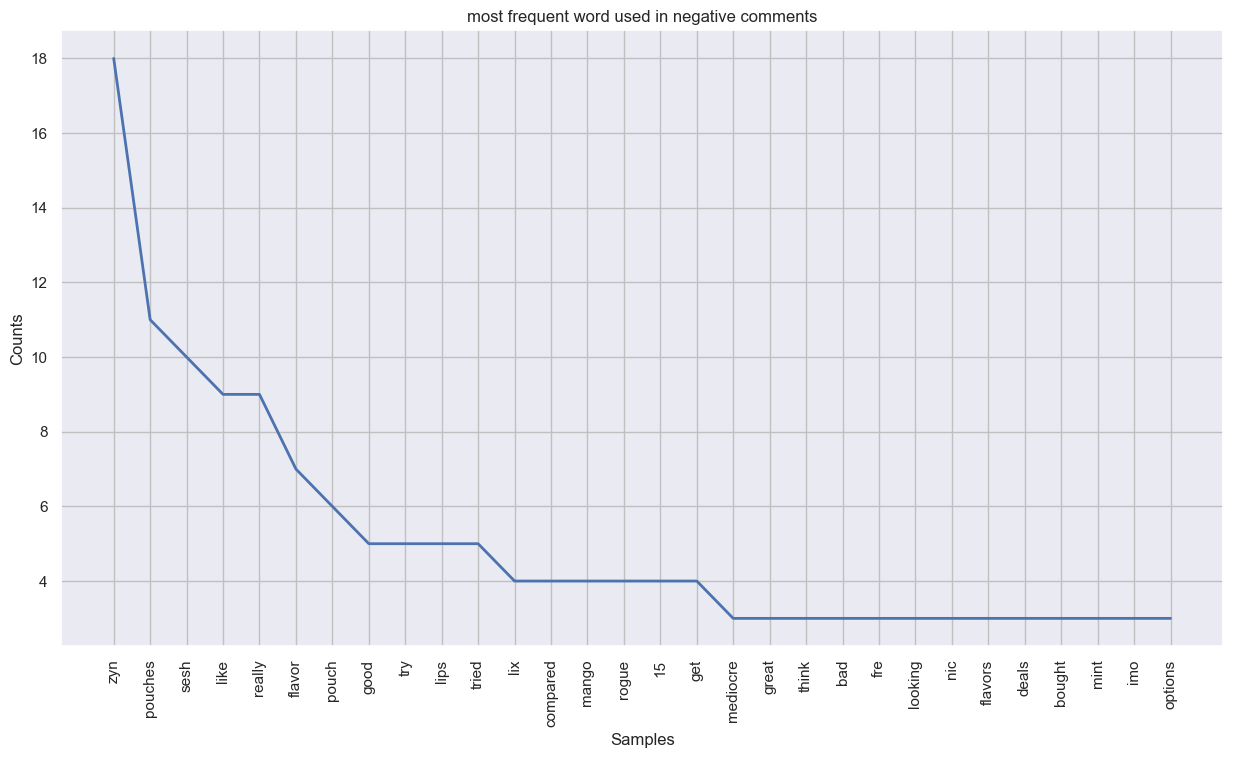

In [588]:
# analyze frequency distributions of negative comments in 2023

date_comments = rate_comments.set_index("date")
date_comments.index = pd.to_datetime(date_comments.index)

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [589]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

      ('15', 'pouches')       ('juice', 'head')       ('nics', 'great')      ('lips', 'really')        ('nic', 'pouch')    ('zyn', 'expensive')     ('expensive', '15')    ('try', 'something')    ('sesh', 'mediocre') ('mediocre', 'thought')     ('thought', 'felt')       ('felt', 'stiff')       ('stiff', 'like')      ('like', 'powder')     ('powder', 'liked')        ('liked', 'lix')       ('lix', 'flavor')     ('flavor', 'lasts')    ('lasts', 'forever')   ('forever', 'you’re')      ('you’re', 'dead')       ('dead', 'right')        ('right', 'i’m')        ('i’m', 'happy')       ('happy', 'paid') 
                      3                       3                       2                       2                       2                       2                       2                       2                       1                       1                       1                       1                       1                       1                       1                       1                

<Axes: title={'center': 'most frequent word used in positive 2023 comments'}, xlabel='Samples', ylabel='Counts'>

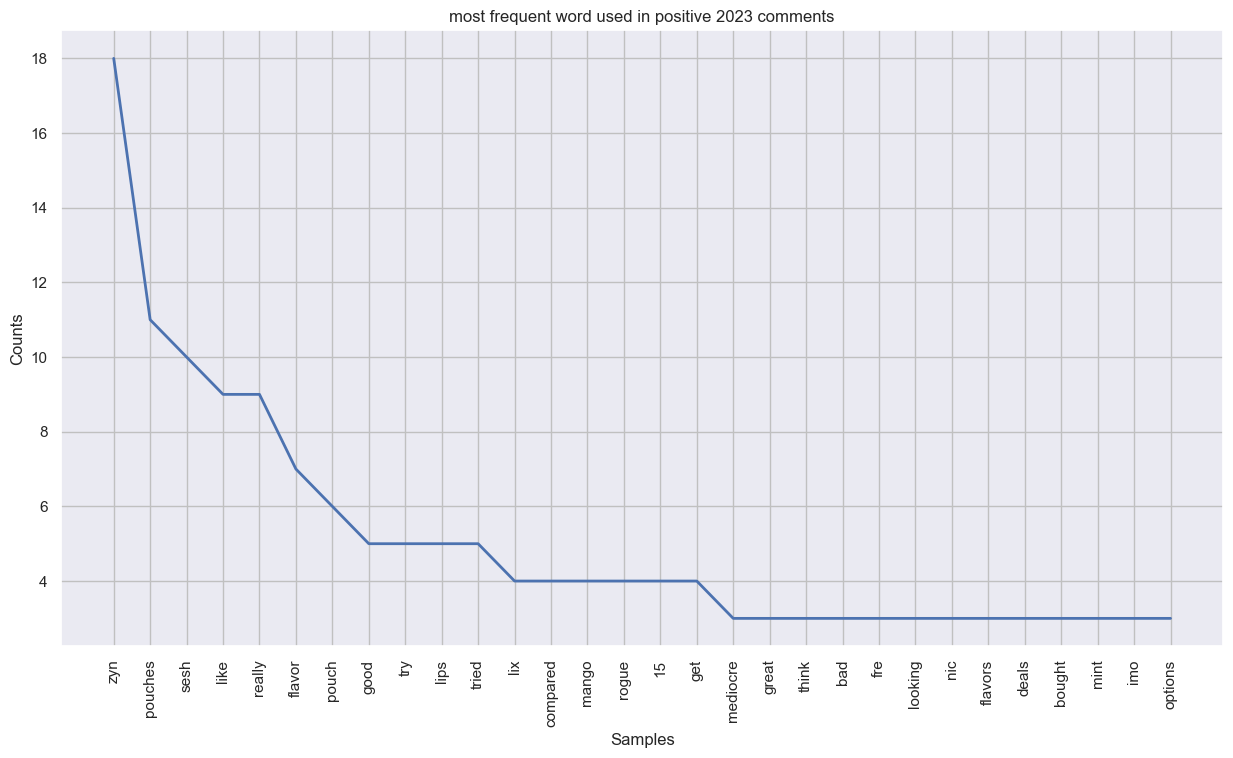

In [590]:
# analyze frequency distributions of positive comments in 2023

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in positive 2023 comments")

In [591]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

            ('', 'i')          ('a', 'few')     ('the', 'flavor')        ('and', 'the')      ('the', 'sesh+')      ('sesh+', 'are')       ('also', 'got')           ('zyn', '')          ('a', 'lot')         ('i', 'need')     ('juice', 'head')              ('', '')          ('i', 'was')   ('was', 'thinking') ('thinking', 'about')   ('about', 'making')       ('making', 'a')         ('a', 'post')     ('post', 'about')     ('about', 'this')      ('this', 'just')       ('just', 'now') ('now', 'hahahahaha')   ('hahahahaha', 'i')        ('i', 'order') 
                    5                     3                     3                     2                     2                     2                     2                     2                     2                     2                     2                     2                     1                     1                     1                     1                     1                     1                     1                     1          

In [592]:
# aggregate all comments in 2023 and analyze

comments2023 = date_comments[date_comments.index < dt.datetime(2023, 12, 31)]

# how many neg/pos/neutral comments?
comments2023["sentiment"].value_counts()

sentiment
irrelevant    29
negative      20
neutral       15
positive       7
Name: count, dtype: int64

<Axes: title={'center': 'most frequent word used in positive 2023 comments'}, xlabel='Samples', ylabel='Counts'>

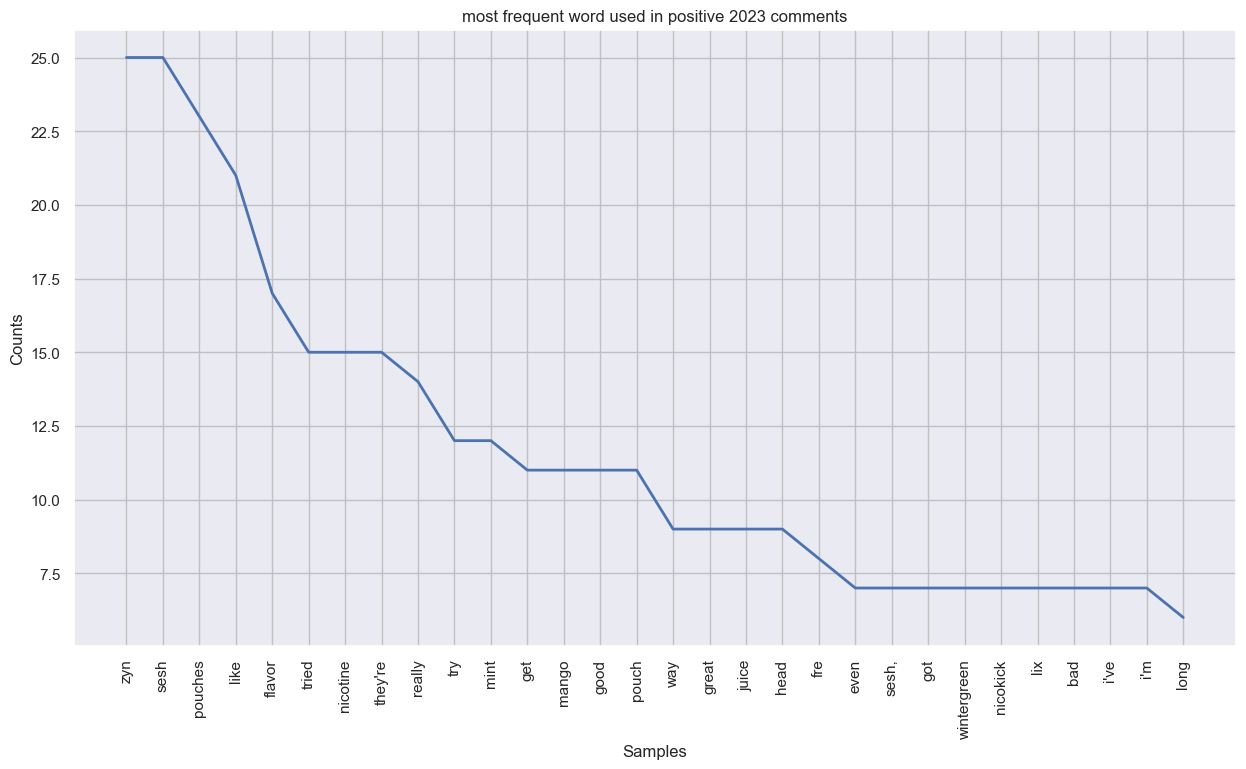

In [593]:
# make distribution graph 
# turn into words to prep for frequency analysis
comments2023 = comments2023["text"].tolist()
words2023 = " ".join(comments2023).replace(".", " ").split(" ")

# remove stopwords
words2023 = [w.lower() for w in words2023 if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(words2023)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in positive 2023 comments")

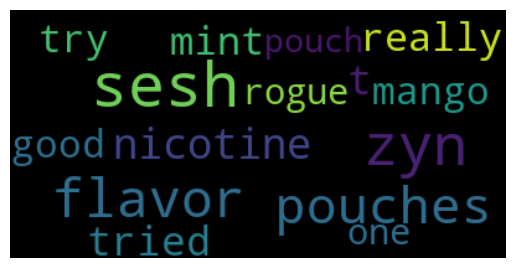

In [594]:
from wordcloud import WordCloud

# make word cloud
wc = WordCloud(max_font_size=50, max_words=15).generate(" ".join(comments2023))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\2810344824.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_rates, y=flavors, palette=colors)


<Axes: >

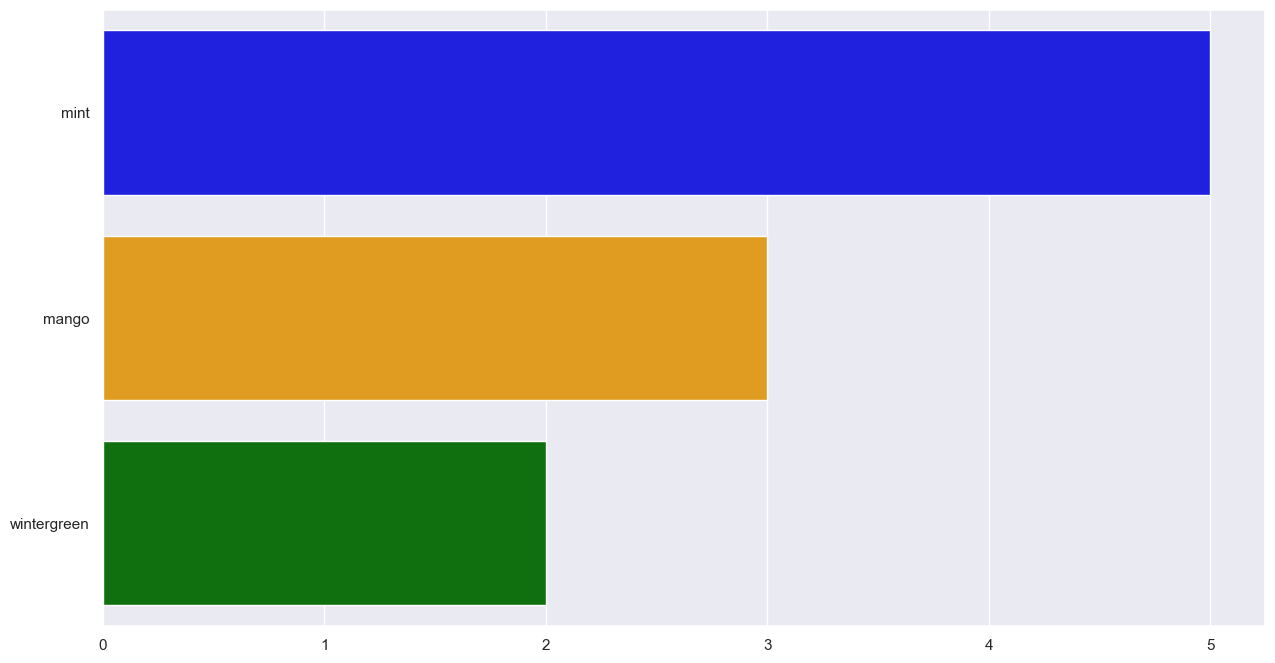

In [595]:
# flavor analysis in 2023 across negative sentiments 

list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

flavors = ["mint", "mango", "wintergreen"]
colors = ["blue", "orange", "green"]

# analyze frequency on flavors in negative 2023 comments
neg_rates = []
for flavor in flavors:
    count = len([1 for comment in list_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
sns.barplot(x=neg_rates, y=flavors, palette=colors)

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\3333971090.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_rates, y=flavors, palette=colors)


<Axes: >

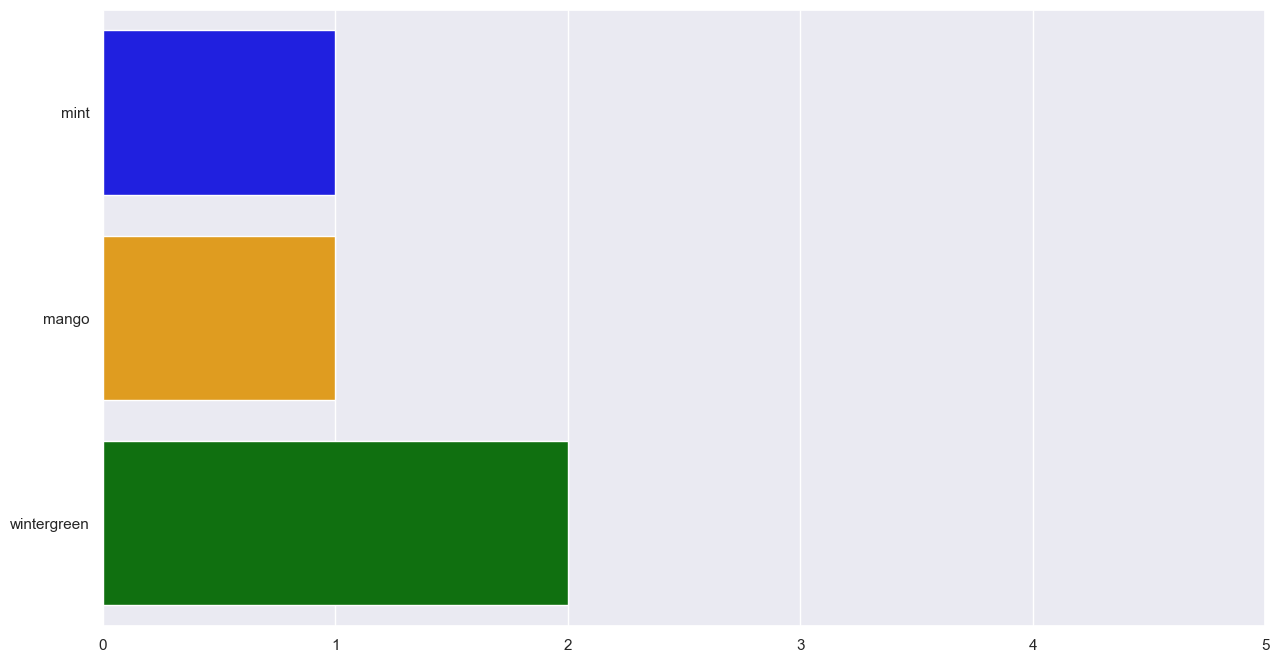

In [596]:
# flavor analysis in 2023 across positive sentiments 

list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

flavors = ["mint", "mango", "wintergreen"]
colors = ["blue", "orange", "green"]

# analyze frequency on flavors in negative 2023 comments
neg_rates = []
for flavor in flavors:
    count = len([1 for comment in list_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
plt.xlim(right=5)
sns.barplot(x=neg_rates, y=flavors, palette=colors)

## 2024

<Axes: title={'center': 'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

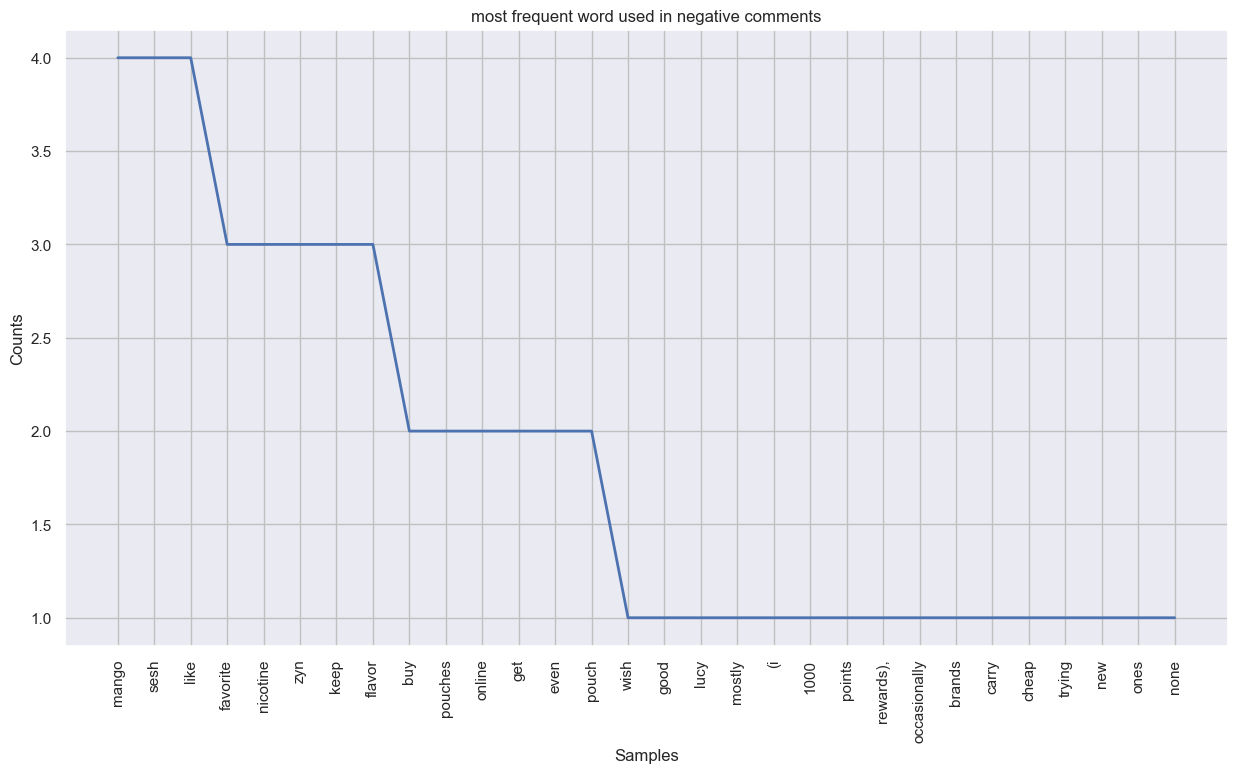

In [597]:
# analyze frequency distributions of negative comments in 2024

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [598]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

            ('sesh', 'mango')       ('nicotine', 'pouches')         ('pouches', 'online')         ('favorite', 'mango')             ('mango', 'wish')              ('wish', 'sesh')             ('mango', 'good')              ('good', 'lucy')               ('lucy', 'buy')           ('buy', 'nicotine')          ('online', 'mostly')             ('mostly', 'get')                ('get', 'zyn')                 ('zyn', '(i')                ('(i', '1000')            ('1000', 'points')       ('points', 'rewards),') ('rewards),', 'occasionally')       ('occasionally', 'get')             ('get', 'brands')           ('brands', 'carry')            ('carry', 'cheap')             ('cheap', 'like')            ('like', 'trying')             ('trying', 'new') 
                            2                             2                             2                             1                             1                             1                             1                             1          

<Axes: title={'center': 'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

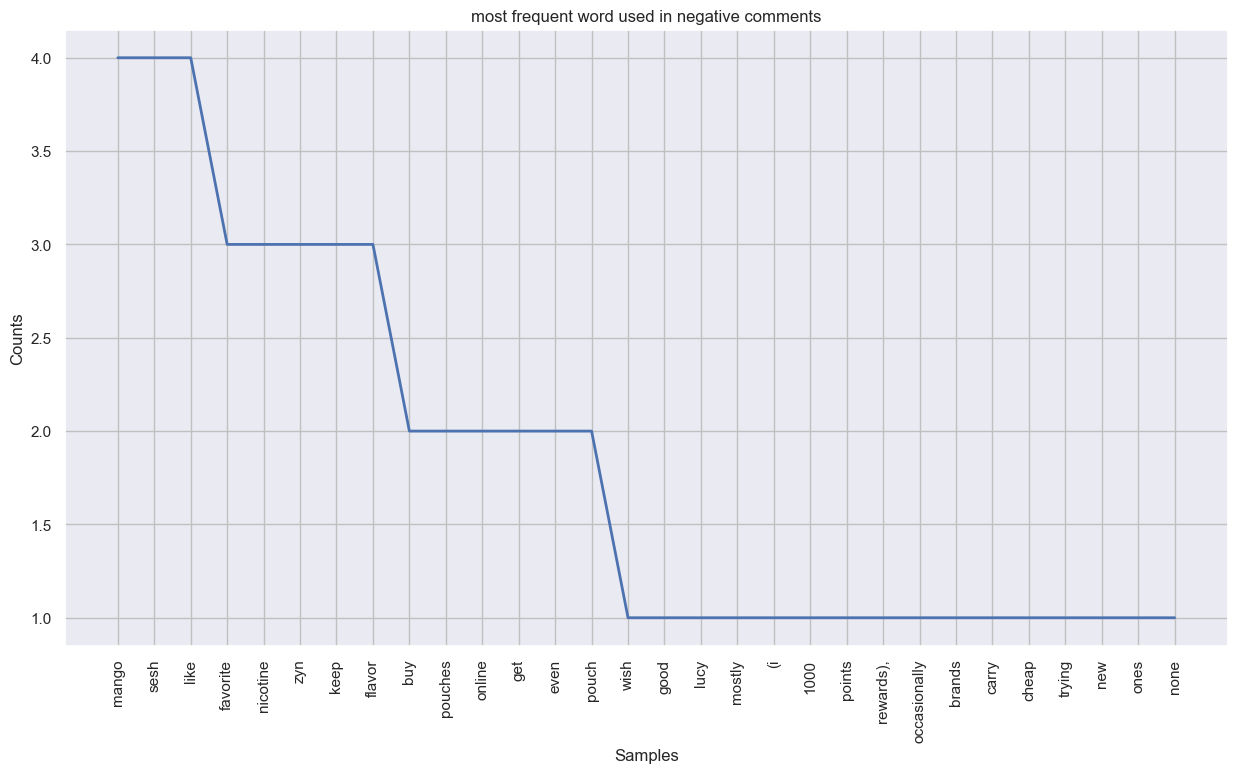

In [599]:
# analyze frequency distributions of positive comments in 2024

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [600]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

         ('', 'i') ('my', 'favorite')       ('a', 'lot')     ('for', 'the')       ('a', 'bit')      ('lot', 'of')       ('', 'they')        ('', 'but')     ('i', 'think')   ('sesh', 'mint')     ('mint', 'is')       ('is', 'my')     ('but', 'the')       ('here', '')           ('', '')    ('sesh', 'and')     ('sesh', 'is')        ('is', 'a')    ('but', 'they')       ('', 'sesh')       ('', 'much')       ('but', 'i')       ('i', 'did')     ('have', 'to')       ('i', 'can') 
                23                  6                  5                  5                  4                  4                  4                  4                  4                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  2 


In [601]:
# aggregate all comments in 2024 and analyze

comments2024 = date_comments[date_comments.index >= dt.datetime(2024, 1, 1)]

# how many neg/pos/neutral comments?
comments2024["sentiment"].value_counts()

sentiment
irrelevant    75
positive      35
neutral       15
negative       5
Name: count, dtype: int64

<Axes: title={'center': 'most frequent word used in positive 2023 comments'}, xlabel='Samples', ylabel='Counts'>

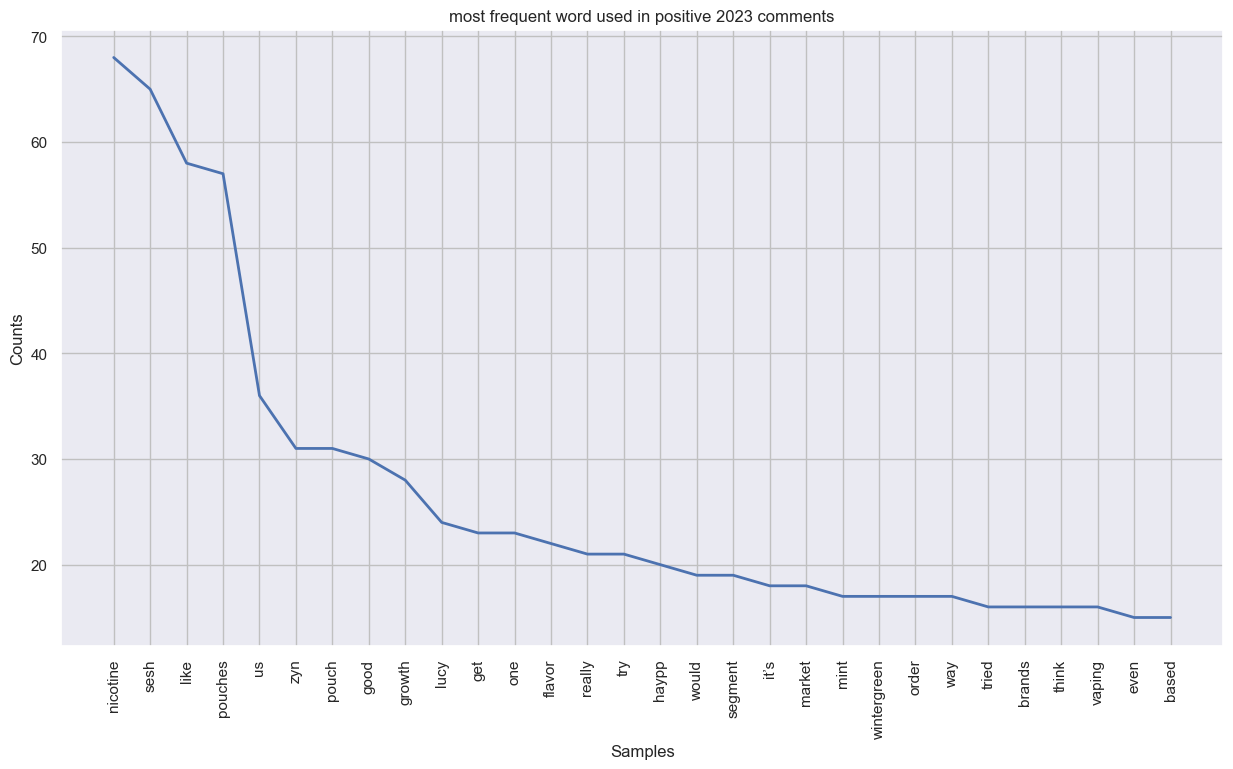

In [602]:
# make distribution graph 
# turn into words to prep for frequency analysis
comments2024 = comments2024["text"].tolist()
words2024 = " ".join(comments2024).replace(".", " ").split(" ")

# remove stopwords
words2024 = [w.lower() for w in words2024 if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(words2024)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in positive 2023 comments")

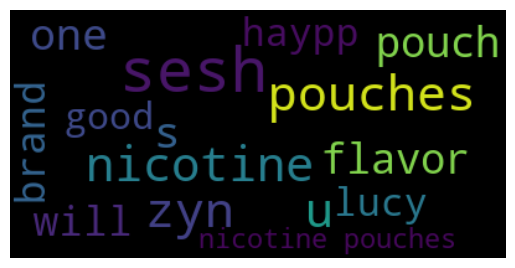

In [603]:
from wordcloud import WordCloud

# make word cloud
wc = WordCloud(max_font_size=50, max_words=15).generate(" ".join(comments2024))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\3840505100.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_rates, y=flavors, palette=colors)


<Axes: >

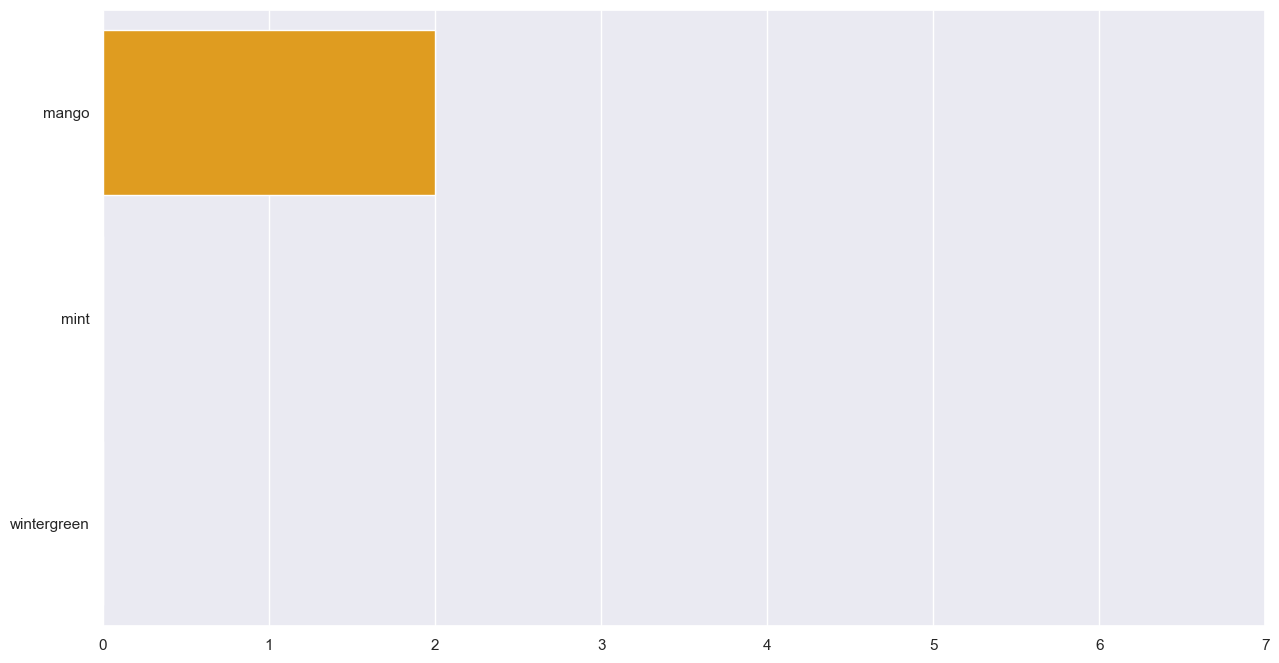

In [604]:
# flavor analysis in 2024 across negative sentiments 

list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

flavors = ["mango", "mint", "wintergreen"]
colors = ["orange", "blue", "green"]

# analyze frequency on flavors in negative 2023 comments
neg_rates = []
for flavor in flavors:
    count = len([1 for comment in list_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
plt.xlim(right=7)
sns.barplot(x=neg_rates, y=flavors, palette=colors)

C:\Users\AZZA\AppData\Local\Temp\ipykernel_16324\2797082309.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_rates, y=flavors, palette=colors)


<Axes: >

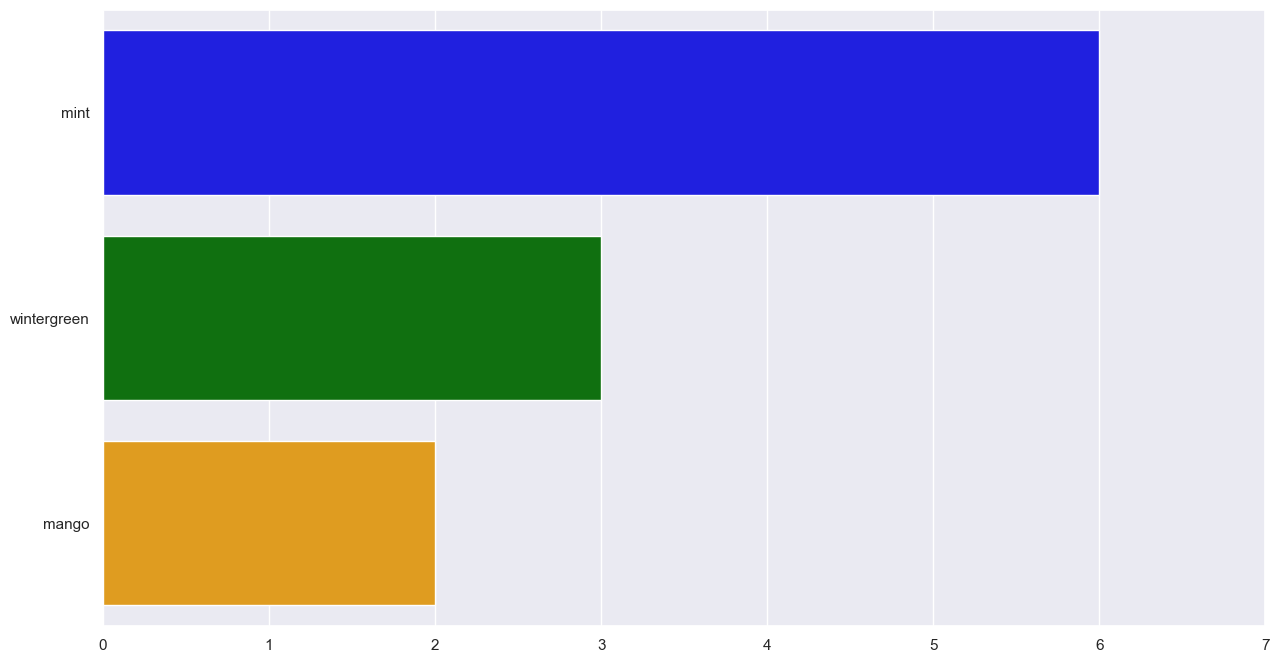

In [605]:
# flavor analysis in 2024 across positive sentiments 

list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

flavors = ["mint", "wintergreen", "mango"]
colors = ["blue", "green", "orange"]

# analyze frequency on flavors in negative 2023 comments
neg_rates = []
for flavor in flavors:
    count = len([1 for comment in list_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
plt.xlim(right=7)
sns.barplot(x=neg_rates, y=flavors, palette=colors)

# Overall Counts

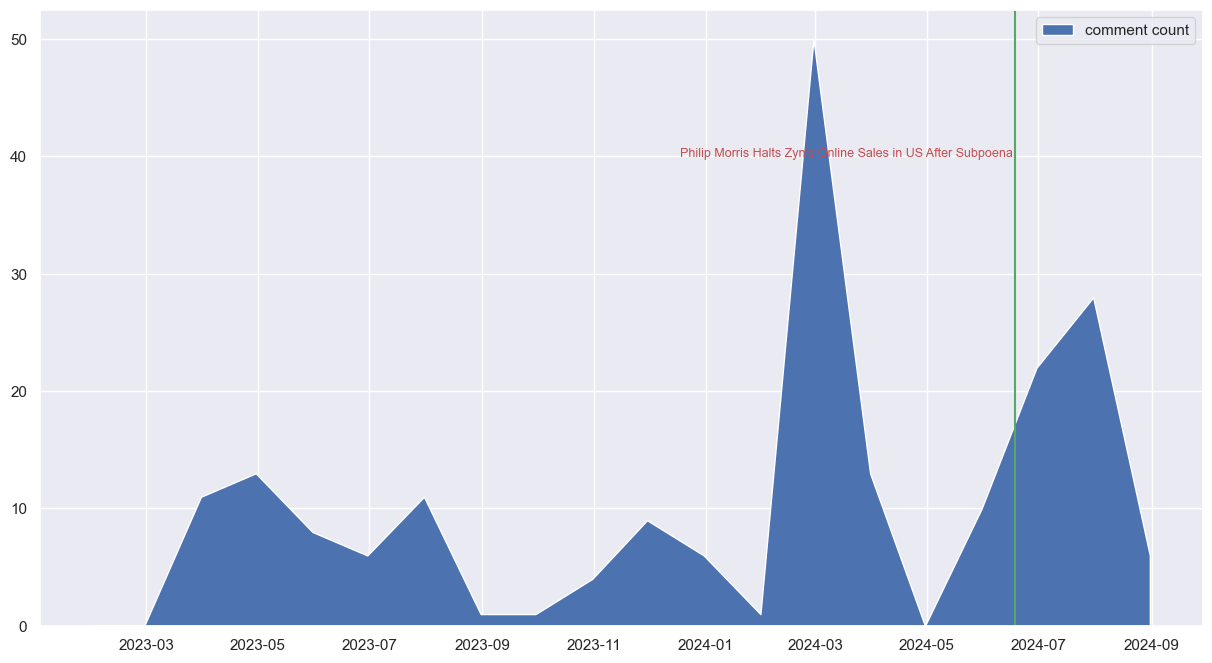

In [606]:
total_comments = select_date.sum(axis=1)

plt.figure(figsize=(15,8))
# plt.ylim(0, 10)

sns.set_theme() 

plt.stackplot(total_comments.index, total_comments.values)
plt.legend(labels=['comment count'])

plt.text(x=dt.datetime(2023, 12, 18), y=40, s='Philip Morris Halts Zyn’s Online Sales in US After Subpoena', color='r', fontsize=9)
plt.axvline(x=dt.datetime(2024, 6, 18), color='g', label='axvline - full height')

